## Explore_Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from sklearn.model_selection import train_test_split
from pydataset import data
import acquire
import prepare

Reading from csv file...
Reading from csv file...
Reading from csv file...


Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [2]:
iris_df = acquire.get_iris_data()
iris_df = prepare.prep_iris(iris_df) 

Reading from csv file...


In [40]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [41]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float64
 1   sepal_width         150 non-null    float64
 2   petal_length        150 non-null    float64
 3   petal_width         150 non-null    float64
 4   species             150 non-null    object 
 5   species_versicolor  150 non-null    uint8  
 6   species_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 6.3+ KB


In [8]:
train_validate, test = train_test_split(iris_df, test_size=.2,
                                       random_state=123,
                                       stratify=iris_df['species'])

In [11]:
train, validate = train_test_split(train_validate, test_size=.3,
                                  random_state=123,
                                  stratify=train_validate['species'])

In [12]:
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

In [39]:
def split_iris_data(df):
    '''
    This function performs split on iris data, stratify species.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(iris_df, test_size=.2,
                                       random_state=123,
                                       stratify=iris_df['species'])
    train, validate = train_test_split(train_validate, test_size=.3,
                                  random_state=123,
                                  stratify=train_validate['species'])
    return train, validate, test

### 2. Univariate Stats

    - For each measurement type (quantitative variable): 
    - create a histogram, 
    - boxplot, 
    - & compute descriptive statistics (using .describe()).

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        84 non-null     float64
 1   sepal_width         84 non-null     float64
 2   petal_length        84 non-null     float64
 3   petal_width         84 non-null     float64
 4   species             84 non-null     object 
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [26]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


In [28]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


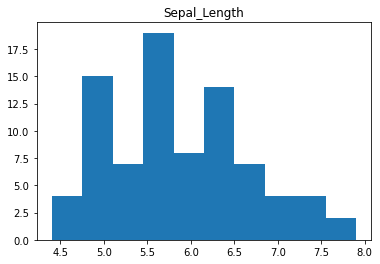

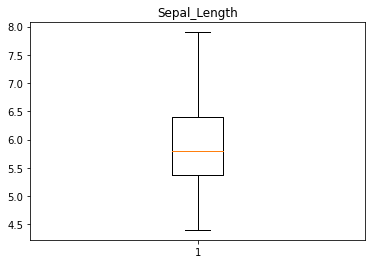

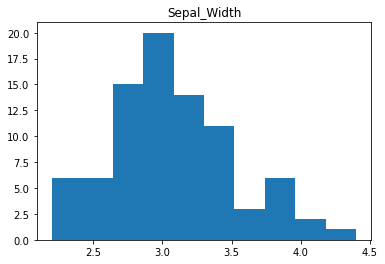

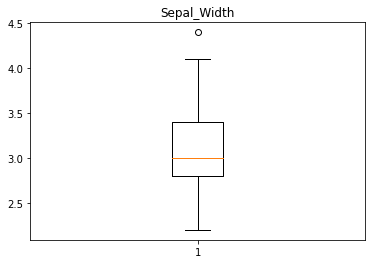

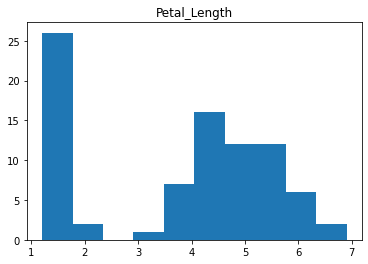

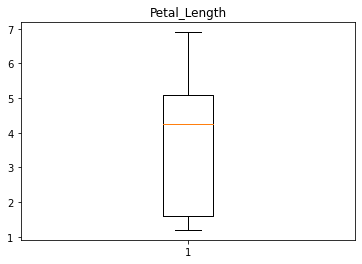

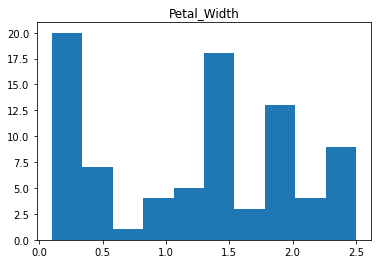

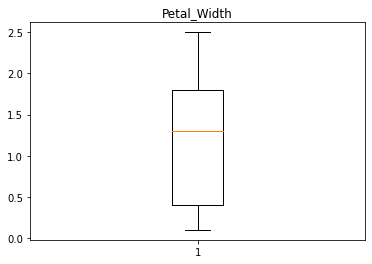

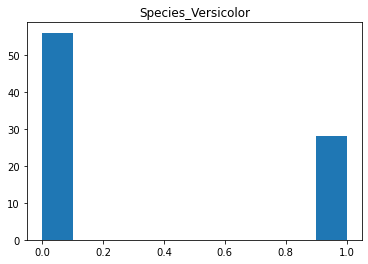

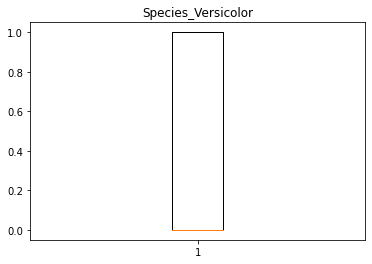

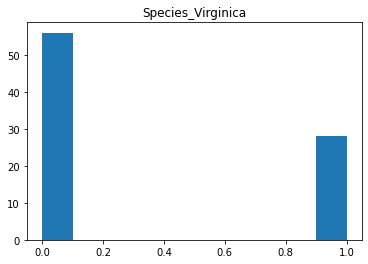

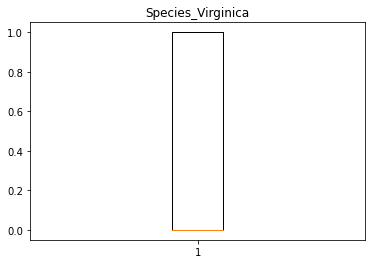

In [44]:
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
        plt.hist(train[col])
        plt.title(col.title())
        plt.show()   
        plt.boxplot(train[col])
        plt.title(col.title())
        plt.show()
                                  

### For each species (categorical variable): 
       - create a frequency table and a 
       - bar plot of those frequencies.

In [37]:
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

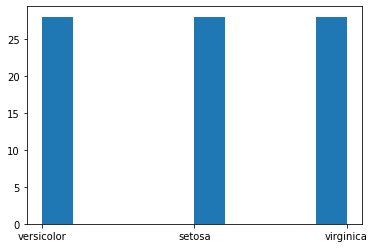

In [38]:
plt.hist(train.species)

### Document takeaways & any actions.

### 3. Bivariate Stats

    - Visualize each measurement type (y-axis) with the species variable (x-axis) using 
    - barplots, 
    - adding a horizontal line showing the overall mean of the metric (y-axis).

    - For each measurement type, compute the descriptive statistics for each species.
    

    - For virginica & versicolor: 
    - Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. 
    - Do the same for the other measurement types.

    - Document takeaways & any actions.

### 4. Multivariate Stats

    - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

    - Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

    - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

    - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

    - Document takeaways and any actions.

## Exercises Part II

Explore your titanic dataset more completely.

    - Determine drivers of the target variable
    - Determine if certain columns should be dropped
    - Determine if it would be valuable to bin some numeric columns
    - Determine if it would be valuable to combine multiple columns into one.


Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

## Exercises Part III
    - Explore your telco data to discover drivers of churn
    - Determine if certain columns should be dropped
    - Determine if it would be valuable to bin some numeric columns
    - Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.